<a href="https://colab.research.google.com/github/junyoung44/DL-fromScratch/blob/main/MNIST/03_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MNIST : 3장 신경망

- sigmoid와 relu를 사용해 순전파
- 배치 처리하고 시간 비교

In [ ]:
!curl -O https://raw.githubusercontent.com/WegraLee/deep-learning-from-scratch/master/dataset/mnist.py

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3655  100  3655    0     0  17240      0 --:--:-- --:--:-- --:--:-- 17159


In [ ]:
import sys, os
import pickle ## 프로그램 실행 중에 특정 객체를 파일로 저장 (실행 당시의 객체를 즉시 복원할 수 있음)
import numpy as np
from mnist import load_mnist
sys.path.append(os.pardir)

In [ ]:
# 시그모이드 함수 정의하기
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [ ]:
# 소프트맥스 함수 정의하기
def softmax(x):
  max=np.max(x)
  x=np.exp(x-max)
  sum=np.sum(x)
  return x/sum

In [ ]:
# mnist.py에 있는 load_mnist() 함수를 사용해 변수에 저장

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

  ## 읽은 데이터를 (훈련 이미지, 훈련 레이블), (시험 이미지, 시험 레이블) 형식으로 변환
  ## normalize : 픽셀값을 정규화할것인가
  ## flatten : 1차원 배열로 만들것인가
  ## one-hot-label



5


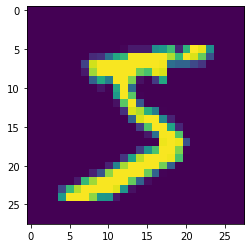

In [ ]:
# matplotlib의 pyplot을 이용하여 그림 출력해보기
from matplotlib.pyplot import imshow

img=x_train[0]
label=t_train[0]

print(label)
imshow(img.reshape(28, 28))

https://github.com/WegraLee/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl

View Raw -> 현재 디렉터리로 sample_weight.pkl 옮기기

In [ ]:
# network라는 변수에 pkl파일을 rb모드로 읽은  값 저장
# pickle.load()함수 사용
with open("sample_weight.pkl", "rb") as f:
  network = pickle.load(f)

In [ ]:
accuracy_cnt = 0
W1, W2, W3 = network["W1"], network["W2"], network["W3"]
b1, b2, b3 = network["b1"], network["b2"], network["b3"]

In [ ]:
# 예측 함수 정의하기
  # x_train에 있는 값에 대해서는 W1과 b1로 가중치 연산
    # 의 결과값에 시그모이드 함수를 적용한 후 W2와 b2로 가중치 연산
      # 의 결과값에 시그모이드 함수를 적용한 후 W3과 b3으로 가중치 연산
        # 의 결과값을 Softmax를 적용한 후, 가장 큰 확률을 가진 친구를 답으로 삼음
def predict(network, x):
  x1=np.dot(x, W1)+b1
  y1=sigmoid(x1)
  x2=np.dot(y1, W2)+b2
  y2=sigmoid(x2)
  x3=np.dot(y2, W3)+b3
  y=softmax(x3)

  return y

In [ ]:
# 돌려보고 Accuracy 확인

for i in range(len(x_test)):
  y = predict(network, x_test[i])
  p = np.argmax(y)
  if p == t_test[i]:
    accuracy_cnt += 1

print("Accuracy:"+str(float(accuracy_cnt)/len(x_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy:0.9207


## 추가 과제
1. Sigmoid 함수 대신 Relu를 사용하고 Accuracy 값 비교하기
2. Sigmoid 함수, Relu 함수를 사용하기에 적합한 상황이 무엇인지 조사하고, 위의 결과가 나온 이유 설명하기 

In [ ]:
# Relu 함수 정의하기
def relu(x):
  return np.maximum(0,x)

In [ ]:
# 예측 함수 정의하고
def predict_1(network, x):
  x1=np.dot(x, W1)+b1
  y1=relu(x1)
  x2=np.dot(y1, W2)+b2
  y2=relu(x2)
  x3=np.dot(y2, W3)+b3
  y=relu(x3)

  return y


# Accuracy 확인하기
accuracy_cnt =0
for i in range(len(x_test)):
  y = predict_1(network, x_test[i])
  p = np.argmax(y)
  if p == t_test[i]:
    accuracy_cnt += 1

print("Accuracy:"+str(float(accuracy_cnt)/len(x_test)))

Accuracy:0.8286


## 추가 과제 2

1. batch처리를 한다
2. batch_size가 달라질 때마다 함수 실행 시간이 얼마나 달라지는지 측정하고 결과를 표로 표시한다
* 예시
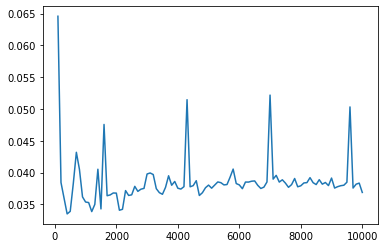

In [ ]:
import time

def predict_by_batch(batch_size):
  accuracy_cnt = 0
  for i in range(0,len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p==t_test[i:i+batch_size])


# 실행시간 측정하기

batch_sizes = [((x+1)*100) for x in range(50)]
times = []

for bs in batch_sizes :
  s = time.time()
  predict_by_batch(bs)
  e = time.time()
  times.append(e-s)
  time.sleep(0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


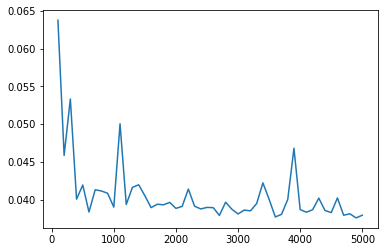

In [ ]:
from matplotlib import pyplot as plt

# 도표 그리기
plt.plot(batch_sizes, times)
plt.show()
# 도표 그리기